In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
files=sorted(glob(r'C:\Users\vikil\Desktop\ML\DATA_SETS\company sales/Sales*.csv'))

In [3]:
data=pd.concat([pd.read_csv(f) for f in files])
data=data.dropna(axis=0, how='all')
data.reset_index(inplace = True, drop = True) 
data=data[data['Order Date'].str[0:2]!='Or']
data['month']=data['Order Date'].str[0:2].astype(int)

In [4]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])
data['Price Each']=pd.to_numeric(data['Price Each'])

# Question 1: What was the best month for sales? How much was earned that month?

In [5]:
data['sales']=data['Quantity Ordered']*data['Price Each']

Text(0, 0.5, 'SALES')

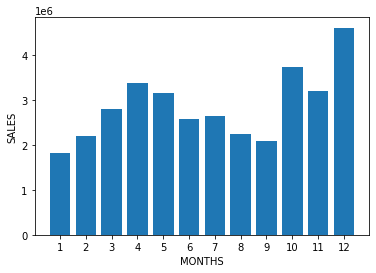

In [6]:
result=data.groupby('month').sum()
months=range(1,13)
plt.bar(months,result['sales'])
plt.xticks(months)
plt.xlabel('MONTHS')
plt.ylabel('SALES')

# Question 2: Which city sold the most product?

In [35]:
def city(address):
    w=address.split(',')
    x=w[2].split(' ')
    y=w[1]+('(@)')
    z=y.replace('@',x[1])
    return z    

In [36]:
data['city_name']=data['Purchase Address'].apply(lambda x: city(x))

Text(0, 0.5, 'SALES')

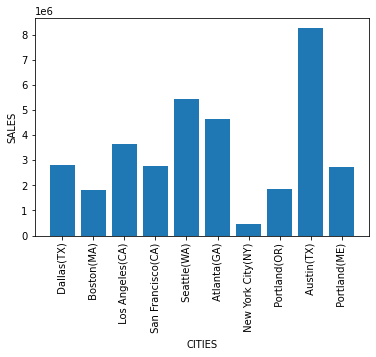

In [37]:
nos=data['city_name'].unique()
plt.bar(nos,data.groupby('city_name').sum()['sales'])
plt.xticks(nos, rotation='vertical')
plt.xlabel('CITIES')
plt.ylabel('SALES')

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product

In [38]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [39]:
data['hour']=data['Order Date'].dt.hour

In [40]:
ds=data.groupby('hour').count()

Text(0, 0.5, 'SALES')

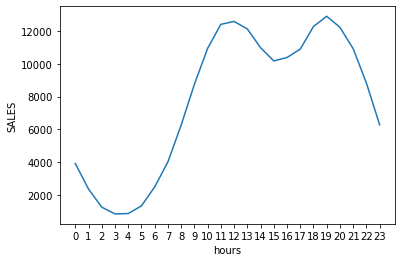

In [41]:
kil=range(0,24)
plt.plot(kil,ds['sales'])
plt.xticks(kil)
plt.xlabel('hours')
plt.ylabel('SALES')

# Question 4: What products are most often sold together? 

In [42]:
dup=data[data['Order ID'].duplicated(keep=False)]

In [43]:
dup.shape

(14649, 10)

In [44]:
dup.reset_index(inplace=True,drop = True) 

In [46]:
dup.drop(['Order Date'], axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,month,sales,city_name,hour
0,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
1,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
2,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19
3,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19
4,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11
...,...,...,...,...,...,...,...,...,...
14644,259303,AA Batteries (4-pack),1,3.84,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta(GA),20
14645,259314,Wired Headphones,1,11.99,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta(GA),0
14646,259314,AAA Batteries (4-pack),2,2.99,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta(GA),0
14647,259350,Google Phone,1,600.00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco(CA),13


In [50]:
dup=dup.groupby(by='Order ID')['Product'].transform(lambda x :','.join(x))

In [56]:
dup=dup.drop_duplicates()

In [59]:
dup=pd.DataFrame(dup)

In [61]:
dup.reset_index(inplace=True,drop=True)

In [62]:
dup

,Product
0,"Google Phone,Wired Headphones"
1,"Google Phone,USB-C Charging Cable"
2,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,"AAA Batteries (4-pack),Google Phone"
4,"Lightning Charging Cable,USB-C Charging Cable"
...,...
361,"LG Dryer,27in 4K Gaming Monitor"
362,"Google Phone,USB-C Charging Cable,Wired Headph..."
363,"LG Dryer,Lightning Charging Cable"
364,"ThinkPad Laptop,LG Dryer"


In [90]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable') 21
('iPhone', 'Lightning Charging Cable') 19
('Google Phone', 'Wired Headphones') 14
('USB-C Charging Cable', 'Wired Headphones') 12
('Google Phone', 'Bose SoundSport Headphones') 8
('iPhone', 'Wired Headphones') 8
('iPhone', 'Apple Airpods Headphones') 7
('Vareebadd Phone', 'Wired Headphones') 7
('Vareebadd Phone', 'USB-C Charging Cable') 6
('USB-C Charging Cable', 'Bose SoundSport Headphones') 6


# What product sold the most? Why do you think it sold the most

In [119]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
product_group=product_group.first()
product_group=product_group.reset_index()
product_group['Product'].unique()

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

Text(0, 0.5, 'QUANTITY')

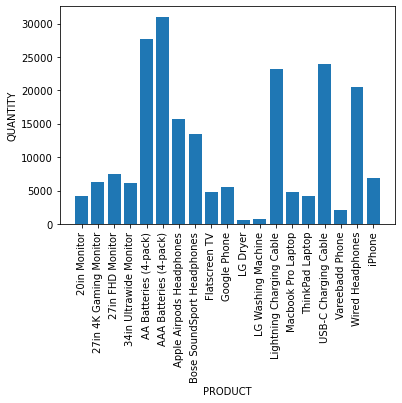

In [122]:
pro=product_group['Product'].unique()
plt.bar(pro,quantity_ordered)
plt.xticks(pro, rotation='vertical')
plt.xlabel('PRODUCT')
plt.ylabel('QUANTITY')

In [123]:
prices=data.groupby('Product').mean()['Price Each']

C:\Users\vikil\Anaconda3\ana\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


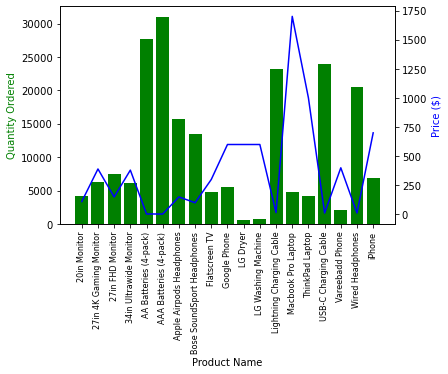

In [128]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(pro,quantity_ordered,color='g')
ax2.plot(pro, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(pro, rotation='vertical', size=8)

fig.show()